In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r"E:\titanic_train.csv")


In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

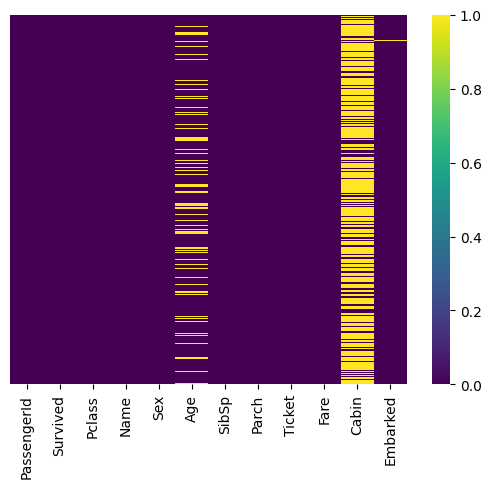

In [4]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)

#The ages and the cabin class has some missing values, we can ignore Embarked as it only has one missing values

In [5]:
def impute_age(cols):
    Age = cols[0]
    Pclass  = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 224
    else:
        return Age

In [6]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

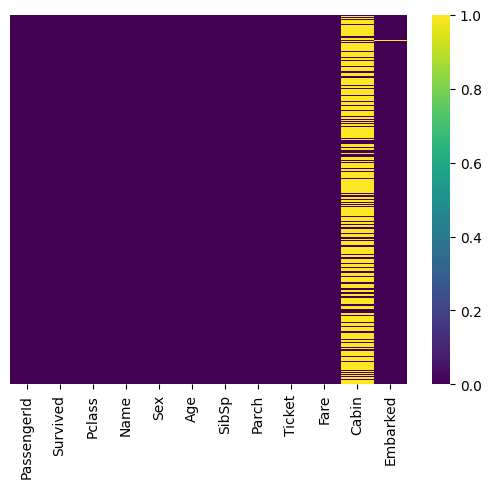

In [7]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)


In [28]:
#for the cabin cilumn, there is so much missing information to do anything with the cabin
#its best to drop it

In [8]:
train.dropna(inplace=True)

In [9]:
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

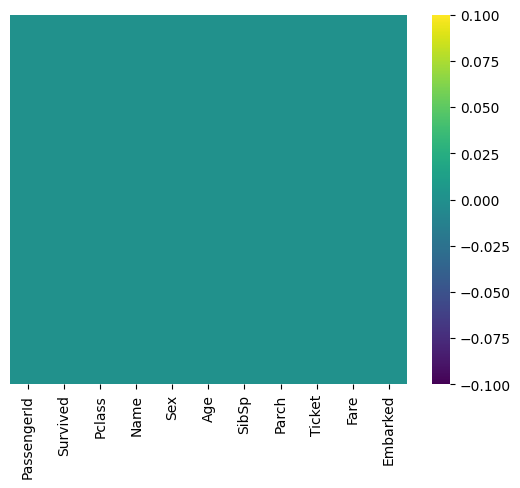

In [10]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)

In [11]:
#Dealing with categorial columns

sex = pd.get_dummies(train['Sex'], drop_first=True)
sex

,male
1,False
3,False
6,True
10,False
11,False
...,...
871,False
872,True
879,False
887,False


In [12]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True
...,...,...
871,False,True
872,False,True
879,False,False
887,False,True


In [13]:
train= pd.concat([train, sex, embark], axis=1)

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,False,False,True
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,False,True


In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [15]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [16]:
#deleting duplicate columns
train = train.transpose().drop_duplicates().transpose()
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7,False,False,True
11,12,1,1,58.0,0,0,26.55,False,False,True
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,False,False,True
872,873,0,1,33.0,0,0,5.0,True,False,True
879,880,1,1,56.0,0,1,83.1583,False,False,False
887,888,1,1,19.0,0,0,30.0,False,False,True


In [17]:
#We can also delete the PassengerId as it is just an index incrementing with 1

train.drop('PassengerId', inplace= True, axis=1)

In [18]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,False,False,False
3,1,1,35.0,1,0,53.1,False,False,True
6,0,1,54.0,0,0,51.8625,True,False,True
10,1,3,4.0,1,1,16.7,False,False,True
11,1,1,58.0,0,0,26.55,False,False,True
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False,True
872,0,1,33.0,0,0,5.0,True,False,True
879,1,1,56.0,0,1,83.1583,False,False,False
887,1,1,19.0,0,0,30.0,False,False,True


In [19]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,False,False,False
3,1,1,35.0,1,0,53.1,False,False,True
6,0,1,54.0,0,0,51.8625,True,False,True
10,1,3,4.0,1,1,16.7,False,False,True
11,1,1,58.0,0,0,26.55,False,False,True
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False,True
872,0,1,33.0,0,0,5.0,True,False,True
879,1,1,56.0,0,1,83.1583,False,False,False
887,1,1,19.0,0,0,30.0,False,False,True


In [20]:
#1. DIVIDE OUR DATA INTO X and Y

X = train.drop('Survived', axis = 1)

y = train["Survived"]

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from  sklearn.linear_model import LogisticRegression

In [31]:
lgr = LogisticRegression()

In [32]:
lgr.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [63]:
X.info

<bound method DataFrame.info of     Pclass   Age SibSp Parch     Fare   male      Q      S
1        1  38.0     1     0  71.2833  False  False  False
3        1  35.0     1     0     53.1  False  False   True
6        1  54.0     0     0  51.8625   True  False   True
10       3   4.0     1     1     16.7  False  False   True
11       1  58.0     0     0    26.55  False  False   True
..     ...   ...   ...   ...      ...    ...    ...    ...
871      1  47.0     1     1  52.5542  False  False   True
872      1  33.0     0     0      5.0   True  False   True
879      1  56.0     0     1  83.1583  False  False  False
887      1  19.0     0     0     30.0  False  False   True
889      1  26.0     0     0     30.0   True  False  False

[202 rows x 8 columns]>

In [67]:
y.info

<bound method Series.info of 1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 202, dtype: object>